<a href="https://colab.research.google.com/github/youssouf2230/Tensorflow_system_recommandation/blob/main/Tensorflow_system_recommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer dataset avec Api kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diabatyoussouf","key":"774e75bd4891936036d47643946381d3"}'}

In [2]:
import os
import zipfile

os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d prajitdatta/movielens-100k-dataset

Dataset URL: https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset
License(s): CC0-1.0
  0% 0.00/4.77M [00:00<?, ?B/s]
100% 4.77M/4.77M [00:00<00:00, 819MB/s]


In [4]:
import zipfile
import os

zip_path = "movielens-100k-dataset.zip"
extract_to = "/content/data_movielens"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Importer Dataset Ratings | Explorer | Prétraiter

In [5]:
import pandas as pd

In [6]:
ratings = pd.read_csv('/content/data_movielens/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [8]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


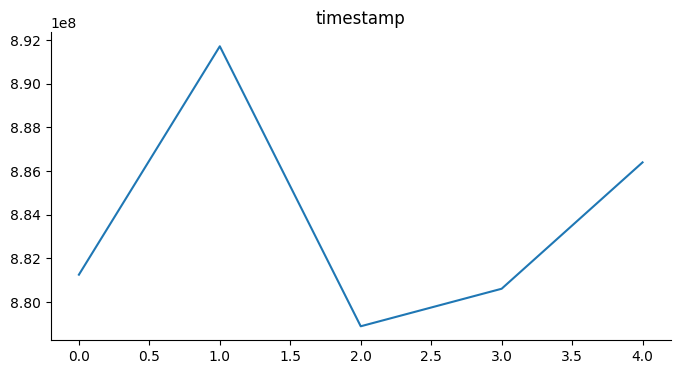

In [10]:
from matplotlib import pyplot as plt
_df_14['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

#  1. Le **modèle** basé sur la **similarité**

#### Pivoter le dataset ratings afin de former une matrice dont les lignes représentent les utilisateurs (**user_id**), les colonnes représentent les items (**item_id**), et les valeurs correspondent aux notes (**ratings**).

In [11]:
ratings_pivot = ratings.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

In [14]:
ratings_pivot.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import numpy as np

##### transformer cette matrice en un tableau numppy


In [17]:
X = np.array(ratings_pivot)

In [18]:
X

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

##### séparer les données X & y

---



In [19]:
y = X[:, 1:]  # prend toutes les colonnes sauf la première
X = X[:, :-1] # prend toutes les colonnes sauf la dernière

In [20]:
y

array([[3., 4., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [21]:
X

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [22]:
(X.shape, y.shape)

((943, 1681), (943, 1681))

##### diviser les données d'entraînements et test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((754, 1681), (189, 1681), (754, 1681), (189, 1681))

#### créer le modèle

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [98]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(X_train.shape[1])
])

In [99]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 256)            │       430,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1681)           │        55,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,297 (2.02 MB)

 Trainable params: 529,297 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:

# Entraînement
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.9165 - val_loss: 0.8328
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8399 - val_loss: 0.7931
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8014 - val_loss: 0.7420
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7383 - val_loss: 0.6901
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7104 - val_loss: 0.6793
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7216 - val_loss: 0.6919
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6680 - val_loss: 0.6566
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6576 - val_loss: 0.6964
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6632 - val_loss: 0.7038
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6644 - val_loss: 0.7223
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6757 - val_loss: 0.7115
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6

In [102]:
# evaluer le model
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6571


0.6963502764701843

In [103]:
import matplotlib.pyplot as plt

In [104]:
def curve(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

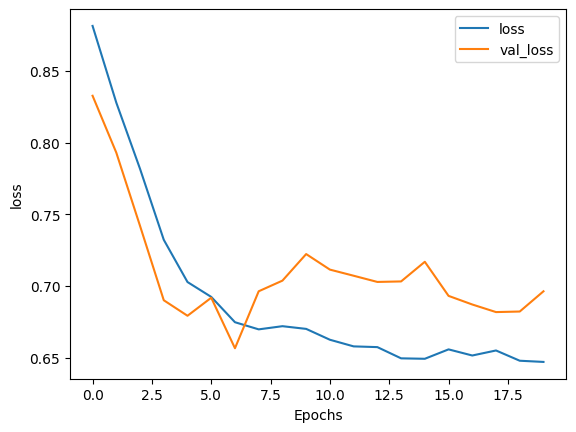

In [105]:
curve(history, 'loss')

In [112]:
# importer dataset utim
movie_cols = ['MovieID', 'Title']
movies = pd.read_csv('/content/data_movielens/ml-100k/u.item', sep='|', names=movie_cols, usecols=range(2), encoding='latin-1')

In [113]:
movies.head()

,MovieID,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [114]:
# faire la prédiction
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [117]:
# fonction de recommandation
def recommend_movies(user_id, num_recommendations=5):
    user_ratings = predictions[user_id]
    top_movie_indices = np.argsort(user_ratings)[::-1][:num_recommendations]
    return top_movie_indices

In [118]:
# faire des prédictions pour chaqueuser dans donner de test
for user_id in range(X_test.shape[0]):
    recommended_movie_indices = recommend_movies(user_id)
    print(f"Recommended movies for User {user_id}:")
    for movie_index in recommended_movie_indices:
        movie_title = movies.loc[movies['MovieID'] == movie_index + 1, 'Title'].values[0]
        print(movie_title)
    print()

Recommended movies for User 0:
I.Q. (1994)
Princess Bride, The (1987)
Apocalypse Now (1979)
Snow White and the Seven Dwarfs (1937)
Dances with Wolves (1990)

Recommended movies for User 1:
I.Q. (1994)
Snow White and the Seven Dwarfs (1937)
Apocalypse Now (1979)
Princess Bride, The (1987)
Dances with Wolves (1990)

Recommended movies for User 2:
I.Q. (1994)
Snow White and the Seven Dwarfs (1937)
Apocalypse Now (1979)
Princess Bride, The (1987)
Dances with Wolves (1990)

Recommended movies for User 3:
I.Q. (1994)
Princess Bride, The (1987)
Apocalypse Now (1979)
Snow White and the Seven Dwarfs (1937)
Spitfire Grill, The (1996)

Recommended movies for User 4:
I.Q. (1994)
Apocalypse Now (1979)
Snow White and the Seven Dwarfs (1937)
Princess Bride, The (1987)
Dances with Wolves (1990)

Recommended movies for User 5:
I.Q. (1994)
Snow White and the Seven Dwarfs (1937)
Apocalypse Now (1979)
Princess Bride, The (1987)
Dances with Wolves (1990)

Recommended movies for User 6:
I.Q. (1994)
Apocalyp